In [1]:
#import numpy as np
import torch


In [5]:
torch.cuda.is_available()
#name of the gpu
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3050 Ti Laptop GPU'

In [ ]:

import matplotlib.pyplot as plt
import cv2
import os

In [3]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)# -1 means all the rest in the dimension
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2)) 

def inside_mask(mask, image):
    mask = np.stack([mask, mask, mask], axis=2)
    mask_image =mask*image
    return mask_image   

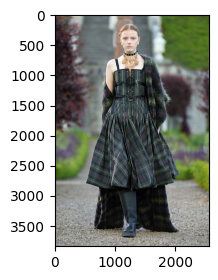

In [23]:
chemin = "defile_vogue/traitee/1245.jpg"

image = cv2.imread(chemin)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.axis('on')
plt.show()

In [3]:
torch.cuda.is_available()

torch.cuda.device_count()

0

## boxes 

In [38]:
def person_detection(results):
    max_size=0
    for obj in results[0].boxes:
        size=int(obj.xyxy[0][2]-obj.xyxy[0][0])*int(obj.xyxy[0][3]-obj.xyxy[0][1])
        if obj.cls[0].tolist()==0 and size>max_size and obj.conf>0.5:
            max_size=size
            person=obj
    return person
def get_handbag(results):
    for obj in results[0].boxes:
        if obj.cls[0].tolist()==26 and obj.conf>0.3:
            handbag=obj
    return handbag 


{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [ ]:
from ultralytics import YOLO
# Load model
model = YOLO("yolov5s.pt")

In [29]:
results = model(image,device="cpu")
person=person_the_biggest(results)
loc=person.xyxy.tolist()[0]
print(loc)



0: 640x448 1 person, 155.8ms
Speed: 2.3ms preprocess, 155.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
[507.3021240234375, 125.4268798828125, 2085.684326171875, 3664.83349609375]


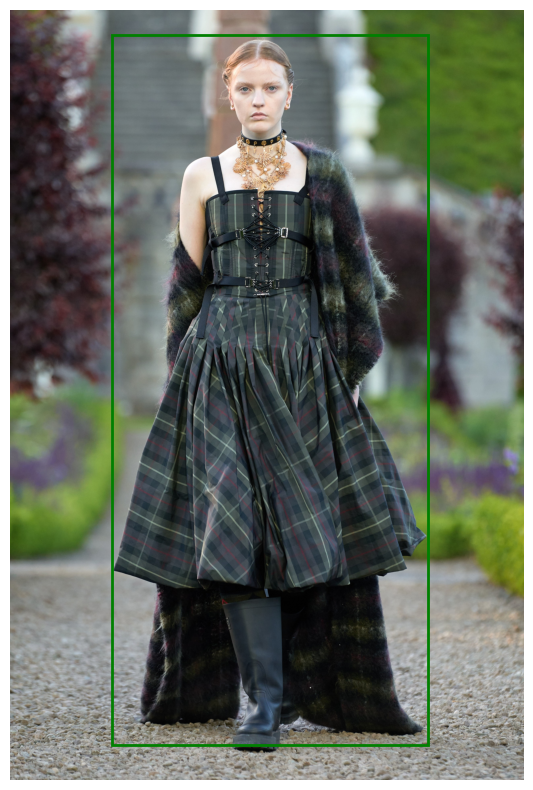

In [32]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
#show_mask(masks[0], plt.gca())
show_box(loc, plt.gca())
plt.axis('off')
plt.show()

In [30]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "C:/Users/alari/Documents/Code/VSC/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

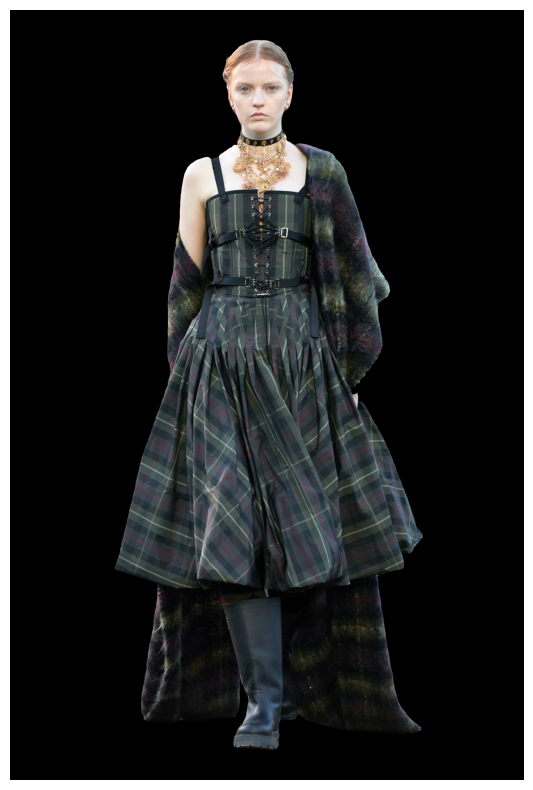

In [31]:
predictor.set_image(image)
input_box = np.array(loc)#[image.shape[1]//16, image.shape[0]//16,15*image.shape[1]//16,  15*image.shape[0]//16]

masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

plt.figure(figsize=(10, 10))
mask_image=inside_mask(masks[0], image)
plt.imshow(mask_image)
plt.axis('off')
plt.show()

In [11]:
def convert_in_RGBA(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)

test=convert_in_RGBA(mask_image)
print(test.shape)

(3840, 2560, 4)


In [13]:
for i in test:
    for j in i:
        if j[0] == 0 and j[1] == 0 and j[2] == 0:
            j[3] = 0

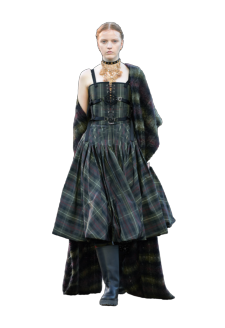

In [39]:
plt.figure(figsize=(4, 4))
plt.imshow(test)
plt.axis('off')
plt.show()

In [69]:
def decoupage_texte(lien):
    return lien.split("/")[-1],lien.split("/")[-2],lien.split("/")[-3]

In [70]:
num,saison,designer=decoupage_texte(chemin)

In [99]:
import os
def telecharger_jpg2(picture,designer,saison,num):

    dossier_nom = os.path.join("defile/traitee", designer, saison)
    if not os.path.exists(dossier_nom):
        os.makedirs(dossier_nom)
    cv2.imwrite(dossier_nom+"/"+num+".png", cv2.cvtColor(picture, cv2.COLOR_RGBA2BGRA))
    
    

In [100]:
#telecharger_jpg2(test,designer,saison,num)